In [44]:
from matplotlib.pyplot import plot, show
from pandas import read_csv
from numpy import gradient, interp, linspace, sum
from scipy.signal import savgol_filter

In [45]:
end = 100
fp = "./2024c/processed_data/2023-wimbledon-1305"
df = read_csv(fp)
df1, df2 = df['p1_points_won'].tolist()[:end], df['p2_points_won'].tolist()[:end]

In [76]:
def grad_n_times(df, n=1):
    for _ in range(n):
        df = gradient(df)
    return df

In [77]:
ori_x = linspace(0, len(df1), num=len(df1))
len(df1)==len(ori_x)
# seq_df1, seq_df2 = interp(ori_x, range(len(df1)), df1), interp(ori_x, range(len(df2)), df2)
seq_df1, seq_df2 = df1, df2

window_size = 5  # 窗口大小
poly_order = 1  # 多项式拟合阶数
seq_df1 = savgol_filter(seq_df1, window_size, poly_order)
seq_df2 = savgol_filter(seq_df2, window_size, poly_order)

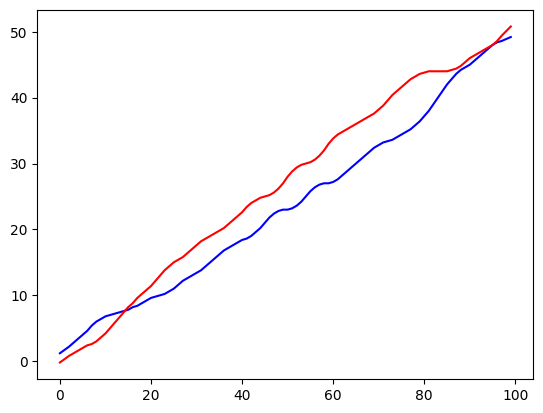

In [78]:

plot(seq_df1, color='blue')
plot(seq_df2, color='red' )

In [85]:
n = 2
deriv1, deriv2 = grad_n_times(seq_df1, n), grad_n_times(seq_df2, n)
# deriv1, deriv2 = grad_n_times(df1, n), grad_n_times(df2, n)
x = list(range(len(seq_df1)))

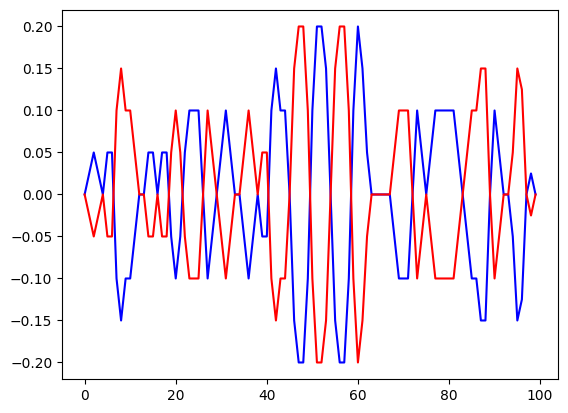

In [86]:
plot(x,deriv1, color='blue')
plot(x,deriv2, color='red' )

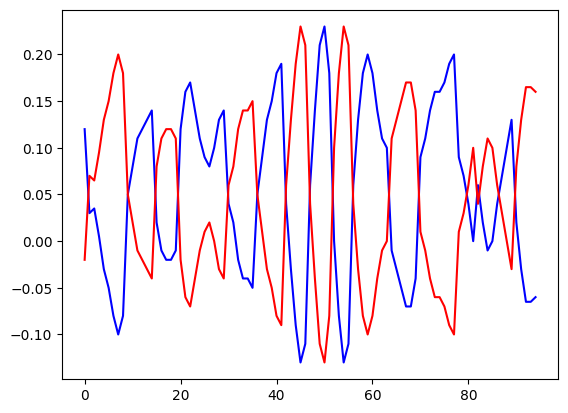

In [87]:
server = df['server'].tolist()
def get_a(idx, deriv, window_size = 5):
    return sum(deriv[max(idx-window_size,0):idx])/window_size
def F(idx, p:int):
    return 0.1*int(p==server[idx])
avg_a1 = [get_a(i, deriv1)+F(i,1) for i in range(5,len(deriv1))]
avg_a2 = [get_a(i, deriv2)+F(i,2) for i in range(5,len(deriv2))]
plot(avg_a1, color='blue')
plot(avg_a2, color='red' )

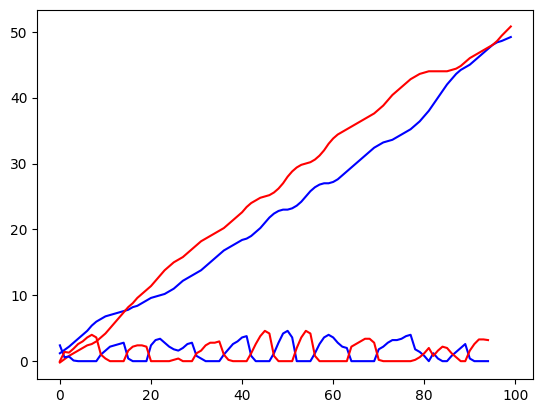

In [89]:

plot(seq_df1, color='blue')
plot(seq_df2, color='red' )
def get_momentum(avg_a):
    res = []
    for i in avg_a:
        i = max(0, i) # 截止设置
        res.append(i*20)
    return res
plot(get_momentum(avg_a1), color='blue')
plot(get_momentum(avg_a2), color='red' )